# Preparing a dataset

* How does the dataset handle invalid values? 
* What do we want to do with null values?
* Do we want to summarise, group or filter the data?

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("owid-covid-data.csv")
df

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 57,Unnamed: 58
0,Pakistan,2/25/2020,2,2,NaN,NaN,NaN,NaN,0.009,0.009,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
1,Pakistan,2/26/2020,2,0,NaN,NaN,NaN,NaN,0.009,0.000,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
2,Pakistan,2/27/2020,2,0,NaN,NaN,NaN,NaN,0.009,0.000,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
3,Pakistan,2/28/2020,4,2,NaN,NaN,NaN,NaN,0.018,0.009,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
4,Pakistan,2/29/2020,4,0,NaN,NaN,NaN,NaN,0.018,0.000,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,Pakistan,3/20/2021,626802,3667,3086.000,13843.0,44.0,47.857,2837.591,16.601,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
390,Pakistan,3/21/2021,630471,3669,3288.286,13863.0,20.0,46.571,2854.200,16.610,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
391,Pakistan,3/22/2021,633741,3270,3396.714,13935.0,72.0,48.571,2869.004,14.804,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
392,Pakistan,3/23/2021,637042,3301,3532.429,13965.0,30.0,44.143,2883.948,14.944,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN


In [2]:
df.head(20)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 57,Unnamed: 58
0,Pakistan,2/25/2020,2,2,NaN,NaN,NaN,NaN,0.009,0.009,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
1,Pakistan,2/26/2020,2,0,NaN,NaN,NaN,NaN,0.009,0.000,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
2,Pakistan,2/27/2020,2,0,NaN,NaN,NaN,NaN,0.009,0.000,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
3,Pakistan,2/28/2020,4,2,NaN,NaN,NaN,NaN,0.018,0.009,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
4,Pakistan,2/29/2020,4,0,NaN,NaN,NaN,NaN,0.018,0.000,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
5,Pakistan,3/1/2020,4,0,0.571,NaN,NaN,0.0,0.018,0.000,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
6,Pakistan,3/2/2020,5,1,0.714,NaN,NaN,0.0,0.023,0.005,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
7,Pakistan,3/3/2020,5,0,0.429,NaN,NaN,0.0,0.023,0.000,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
8,Pakistan,3/4/2020,5,0,0.429,NaN,NaN,0.0,0.023,0.000,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN
9,Pakistan,3/5/2020,6,1,0.571,NaN,NaN,0.0,0.027,0.005,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN


In [3]:
df.dtypes

location                                  object
date                                      object
total_cases                                int64
new_cases                                  int64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_million                float64
weekly_icu_admissions                    float64
weekly_icu_admission

In [4]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 57,Unnamed: 58
count,394.000000,394.000000,389.000000,372.000000,372.000000,389.00000,394.000000,394.000000,389.000000,372.000000,...,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,0.0,0.0
mean,287125.535533,1626.873096,1620.060208,6424.620968,37.709677,35.69226,1299.843850,7.365008,7.334183,29.084871,...,4.230310e+02,8.350000e+00,2.800000e+00,3.670000e+01,5.960700e+01,6.000000e-01,6.727000e+01,5.570000e-01,NaN,NaN
std,196256.135980,1446.514199,1300.114718,4097.792988,34.603439,28.69063,888.469669,6.548514,5.885737,18.551092,...,1.024482e-12,5.691569e-14,2.045408e-14,2.418917e-13,2.134338e-14,3.890721e-15,3.699520e-13,4.224212e-15,NaN,NaN
min,2.000000,0.000000,0.286000,2.000000,0.000000,0.00000,0.009000,0.000000,0.001000,0.009000,...,4.230310e+02,8.350000e+00,2.800000e+00,3.670000e+01,5.960700e+01,6.000000e-01,6.727000e+01,5.570000e-01,NaN,NaN
25%,81663.250000,582.000000,611.714000,3343.750000,10.000000,9.57100,369.696750,2.635000,2.769000,15.137750,...,4.230310e+02,8.350000e+00,2.800000e+00,3.670000e+01,5.960700e+01,6.000000e-01,6.727000e+01,5.570000e-01,NaN,NaN
50%,299844.500000,1307.500000,1317.000000,6418.000000,32.000000,32.85700,1357.424000,5.919000,5.962000,29.055000,...,4.230310e+02,8.350000e+00,2.800000e+00,3.670000e+01,5.960700e+01,6.000000e-01,6.727000e+01,5.570000e-01,NaN,NaN
75%,447885.750000,2414.750000,2317.857000,9494.750000,56.250000,51.71400,2027.620500,10.931750,10.493000,42.983750,...,4.230310e+02,8.350000e+00,2.800000e+00,3.670000e+01,5.960700e+01,6.000000e-01,6.727000e+01,5.570000e-01,NaN,NaN
max,640988.000000,12073.000000,6533.286000,14028.000000,313.000000,135.71400,2901.812000,54.656000,29.577000,63.506000,...,4.230310e+02,8.350000e+00,2.800000e+00,3.670000e+01,5.960700e+01,6.000000e-01,6.727000e+01,5.570000e-01,NaN,NaN


In [5]:
df.groupby("location").mean()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 57,Unnamed: 58
location,,,,,,,,,,,,,,,,,,,,,
Pakistan,287125.535533,1626.873096,1620.060208,6424.620968,37.709677,35.69226,1299.84385,7.365008,7.334183,29.084871,...,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,NaN,NaN


In [6]:
df.info

<bound method DataFrame.info of      location       date  total_cases  new_cases  new_cases_smoothed  \
0    Pakistan  2/25/2020            2          2                 NaN   
1    Pakistan  2/26/2020            2          0                 NaN   
2    Pakistan  2/27/2020            2          0                 NaN   
3    Pakistan  2/28/2020            4          2                 NaN   
4    Pakistan  2/29/2020            4          0                 NaN   
..        ...        ...          ...        ...                 ...   
389  Pakistan  3/20/2021       626802       3667            3086.000   
390  Pakistan  3/21/2021       630471       3669            3288.286   
391  Pakistan  3/22/2021       633741       3270            3396.714   
392  Pakistan  3/23/2021       637042       3301            3532.429   
393  Pakistan  3/24/2021       640988       3946            3596.857   

     total_deaths  new_deaths  new_deaths_smoothed  total_cases_per_million  \
0             NaN       

So it looks like they are using `0` values where they dont have data. I don't think theyre using `NaN` at all, but if they were we could either drop those rows (`dropna`) or fill them to some value (`fillna`). Because they're using `0` already, it might be prudent to do this just in case.

In [7]:
a = [1,2,np.nan,4]

In [8]:
a

[1, 2, nan, 4]

In [9]:
df_a = pd.DataFrame(a)

In [10]:
df_a.fillna(-999)

,0
0,1.0
1,2.0
2,-999.0
3,4.0


In [80]:
df = df.fillna(0)

So now we know there are `NaN` values. We could also have just, you know, checked for `NaN`, but now I'm trying to show functions you can use.

So, what to do with these zero values. In some cases we could fill them with something sensible, but that normally just biases the data. So mostly we'd ignore them. So what we want to do is ask *how* we want to use the data. Will we be using `SkinThickness`? Do we care if there are non-physical outliers?

If we cared about 	total_cases, total_deaths and 	cardiovasc_death_rate, we could get rid of a ton of these issues but only looking at those columns

In [23]:
df2 = df[["location","date" ,"total_cases","new_cases","new_cases_smoothed" ,"new_deaths","total_deaths" ,"new_deaths_smoothed","total_cases_per_million","new_cases_per_million"]]

In [24]:
df2.head(10)

,location,date,total_cases,new_cases,new_cases_smoothed,new_deaths,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million
0,Pakistan,2/25/2020,2,2,NaN,NaN,NaN,NaN,0.009,0.009
1,Pakistan,2/26/2020,2,0,NaN,NaN,NaN,NaN,0.009,0.000
2,Pakistan,2/27/2020,2,0,NaN,NaN,NaN,NaN,0.009,0.000
3,Pakistan,2/28/2020,4,2,NaN,NaN,NaN,NaN,0.018,0.009
4,Pakistan,2/29/2020,4,0,NaN,NaN,NaN,NaN,0.018,0.000
5,Pakistan,3/1/2020,4,0,0.571,NaN,NaN,0.0,0.018,0.000
6,Pakistan,3/2/2020,5,1,0.714,NaN,NaN,0.0,0.023,0.005
7,Pakistan,3/3/2020,5,0,0.429,NaN,NaN,0.0,0.023,0.000
8,Pakistan,3/4/2020,5,0,0.429,NaN,NaN,0.0,0.023,0.000
9,Pakistan,3/5/2020,6,1,0.571,NaN,NaN,0.0,0.027,0.005


In [25]:
df2.describe()

,total_cases,new_cases,new_cases_smoothed,new_deaths,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million
count,394.000000,394.000000,389.000000,372.000000,372.000000,389.00000,394.000000,394.000000
mean,287125.535533,1626.873096,1620.060208,37.709677,6424.620968,35.69226,1299.843850,7.365008
std,196256.135980,1446.514199,1300.114718,34.603439,4097.792988,28.69063,888.469669,6.548514
min,2.000000,0.000000,0.286000,0.000000,2.000000,0.00000,0.009000,0.000000
25%,81663.250000,582.000000,611.714000,10.000000,3343.750000,9.57100,369.696750,2.635000
50%,299844.500000,1307.500000,1317.000000,32.000000,6418.000000,32.85700,1357.424000,5.919000
75%,447885.750000,2414.750000,2317.857000,56.250000,9494.750000,51.71400,2027.620500,10.931750
max,640988.000000,12073.000000,6533.286000,313.000000,14028.000000,135.71400,2901.812000,54.656000


But now lets get rid of any stray zeros. 

What we want to do is find a row with *any* number of zeros and remove that row. Or in terms of applying a mask, find the rows which have any zero (True), invert that (to False) so when we apply the mask using `loc`, the False entries get dropped.

In [27]:
df2[['total_cases','new_cases','total_deaths','total_cases_per_million']]

,total_cases,new_cases,total_deaths,total_cases_per_million
0,2,2,NaN,0.009
1,2,0,NaN,0.009
2,2,0,NaN,0.009
3,4,2,NaN,0.018
4,4,0,NaN,0.018
...,...,...,...,...
389,626802,3667,13843.0,2837.591
390,630471,3669,13863.0,2854.200
391,633741,3270,13935.0,2869.004
392,637042,3301,13965.0,2883.948


In [28]:
df2[df2.columns[:-1]] == 0

,location,date,total_cases,new_cases,new_cases_smoothed,new_deaths,total_deaths,new_deaths_smoothed,total_cases_per_million
0,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
389,False,False,False,False,False,False,False,False,False
390,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False


In [29]:
df2[~(df2[df2.columns[:-1]] == 0).any(axis=1)]

,location,date,total_cases,new_cases,new_cases_smoothed,new_deaths,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million
0,Pakistan,2/25/2020,2,2,NaN,NaN,NaN,NaN,0.009,0.009
3,Pakistan,2/28/2020,4,2,NaN,NaN,NaN,NaN,0.018,0.009
22,Pakistan,3/18/2020,454,155,62.000,2.0,2.0,0.286,2.055,0.702
23,Pakistan,3/19/2020,501,47,67.571,1.0,3.0,0.429,2.268,0.213
25,Pakistan,3/21/2020,776,46,103.286,2.0,5.0,0.714,3.513,0.208
...,...,...,...,...,...,...,...,...,...,...
389,Pakistan,3/20/2021,626802,3667,3086.000,44.0,13843.0,47.857,2837.591,16.601
390,Pakistan,3/21/2021,630471,3669,3288.286,20.0,13863.0,46.571,2854.200,16.610
391,Pakistan,3/22/2021,633741,3270,3396.714,72.0,13935.0,48.571,2869.004,14.804
392,Pakistan,3/23/2021,637042,3301,3532.429,30.0,13965.0,44.143,2883.948,14.944


In [30]:
df3 = df2.loc[~(df2[df2.columns[:-1]] == 0).any(axis=1)]
df3.describe()

,total_cases,new_cases,new_cases_smoothed,new_deaths,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million
count,361.000000,361.000000,359.000000,359.000000,359.000000,359.000000,361.000000,361.000000
mean,304405.060942,1774.138504,1706.943875,39.075209,6466.030641,37.633911,1378.069853,8.031684
std,190963.615758,1422.805161,1281.708901,34.458256,4128.082111,28.377712,864.509943,6.441191
min,2.000000,2.000000,62.000000,1.000000,2.000000,0.286000,0.009000,0.009000
25%,160118.000000,671.000000,637.357500,12.000000,3305.500000,11.214500,724.869000,3.038000
50%,308217.000000,1436.000000,1416.286000,33.000000,6444.000000,37.714000,1395.327000,6.501000
75%,465070.000000,2475.000000,2384.000000,58.000000,9710.500000,52.000000,2105.415000,11.205000
max,640988.000000,12073.000000,6533.286000,313.000000,14028.000000,135.714000,2901.812000,54.656000


Great, so we've selected the data we cared about, made sure it has no `null`-like values. We'll go on to checking things look sane with some plots in the next section. One final thing we could do is to group the data by outcome. It might make it easier to look for patterns in diagnoses.

We can do this either by splitting out the DataFrame into two (one for yes and one for no), or if we wanted summary statistics we could use the `groupBy` function:

In [31]:
df3.groupby("location").mean()

,total_cases,new_cases,new_cases_smoothed,new_deaths,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million
location,,,,,,,,
Pakistan,304405.060942,1774.138504,1706.943875,39.075209,6466.030641,37.633911,1378.069853,8.031684


And what this can tell us is that, in general, the higher your glucose level, the more overweight you are, and the older you are, the greater your chance of being diagnosed with diabetes. Which, perhaps, is not that surprising.

We can do other things using the `groupby` statement, like so:

In [36]:
df3.groupby("location").agg({"total_cases": "mean", "new_cases": "median", "new_deaths":"mean","total_deaths": "median", "total_cases_per_million": "sum"})

,total_cases,new_cases,new_deaths,total_deaths,total_cases_per_million
location,,,,,
Pakistan,304405.060942,1436,39.075209,6444.0,497483.217


In [37]:
df3.groupby("location").agg(["mean", "median"])

total_cases            new_cases        new_cases_smoothed  \
                   mean  median         mean median               mean   
location                                                                 
Pakistan  304405.060942  308217  1774.138504   1436        1706.943875   

                   new_deaths        total_deaths         new_deaths_smoothed  \
            median       mean median         mean  median                mean   
location                                                                        
Pakistan  1416.286  39.075209   33.0  6466.030641  6444.0           37.633911   

                 total_cases_per_million           new_cases_per_million  \
          median                    mean    median                  mean   
location                                                                   
Pakistan  37.714             1378.069853  1395.327              8.031684   

                 
         median  
location         
Pakistan  6.501

We can also split the dataset into positive and negative outcomes if we wanted. *If*.

In [38]:
positive = df3.loc[df3["location"] == 1]
negative = df3.loc[df3["location"] == 0]
print(positive.shape, negative.shape)

(0, 10) (0, 10)


We won't use this splitting just yet, so lets save out the cleaned and prepared dataset, `df3` to file, so our analysis code can load it in the future without having to copy-paste the data prep code into future notebooks.

In [40]:
df3.to_csv("covid_data.csv", index=False)

In [41]:
df3.head()

,location,date,total_cases,new_cases,new_cases_smoothed,new_deaths,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million
0,Pakistan,2/25/2020,2,2,NaN,NaN,NaN,NaN,0.009,0.009
3,Pakistan,2/28/2020,4,2,NaN,NaN,NaN,NaN,0.018,0.009
22,Pakistan,3/18/2020,454,155,62.000,2.0,2.0,0.286,2.055,0.702
23,Pakistan,3/19/2020,501,47,67.571,1.0,3.0,0.429,2.268,0.213
25,Pakistan,3/21/2020,776,46,103.286,2.0,5.0,0.714,3.513,0.208


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

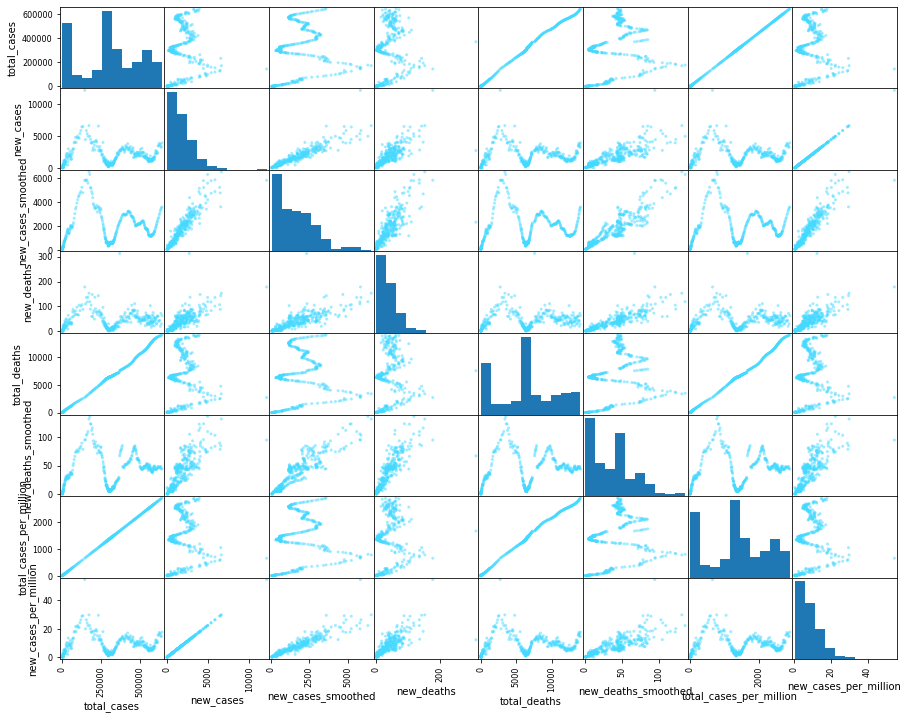

In [44]:
df3 = df3.dropna()
colors = df3["total_cases"].map(lambda x: "#44d9ff" if x else "#f95b4a")
pd.plotting.scatter_matrix(df3, figsize=(15,12), color=colors);

The scatter plot gives us both the histograms for the distributions along the diagonal, and also a lot of 2D scatter plots off-diagonal. Not that this is a symmetric matrix, so I just look at the diagonal and below it normally. We can see that some variables have a lot of scatter and some are correlated (ie there is a direction in their scatter). Which leads us to...

# Correlation Plots

To easily quantify which variables / attributes are correlated with others!

In [46]:
 df3.corr()

,total_cases,new_cases,new_cases_smoothed,new_deaths,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million
total_cases,1.000000,0.106725,0.149363,0.171190,0.998168,0.249774,1.000000,0.106722
new_cases,0.106725,1.000000,0.923522,0.777188,0.092257,0.816022,0.106725,1.000000
new_cases_smoothed,0.149363,0.923522,1.000000,0.787640,0.131102,0.915703,0.149363,0.923522
new_deaths,0.171190,0.777188,0.787640,1.000000,0.160504,0.830933,0.171190,0.777186
total_deaths,0.998168,0.092257,0.131102,0.160504,1.000000,0.237204,0.998168,0.092254
new_deaths_smoothed,0.249774,0.816022,0.915703,0.830933,0.237204,1.000000,0.249774,0.816021
total_cases_per_million,1.000000,0.106725,0.149363,0.171190,0.998168,0.249774,1.000000,0.106722
new_cases_per_million,0.106722,1.000000,0.923522,0.777186,0.092254,0.816021,0.106722,1.000000


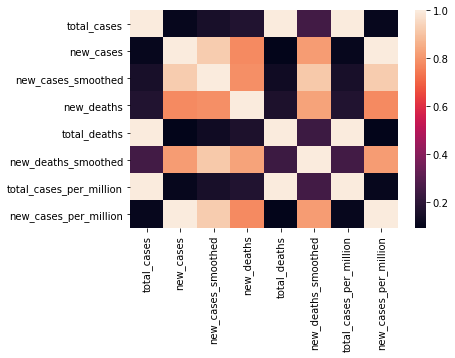

In [47]:
sb.heatmap(df3.corr());

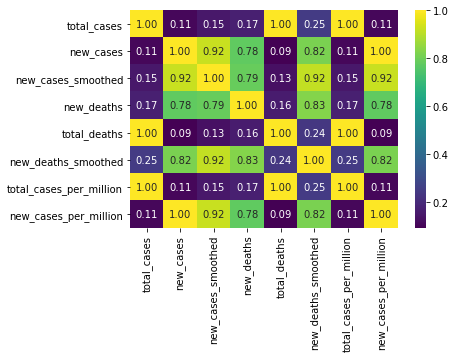

In [49]:
sb.heatmap(df3.corr(), annot=True, cmap="viridis", fmt="0.2f");

And you can see this is a symmetric matrix too. But it immedietly allows us to point out the most correlated and anti-correlated attributes. Some might just be common sense - Pregnancies v Age for example - but some might give us real insight into the data.


# 2D Histograms

For the rest of this section, we're going to use a different dataset which has more data in it. 

Useful when you have a *lot* of data. [See here for the API](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html)

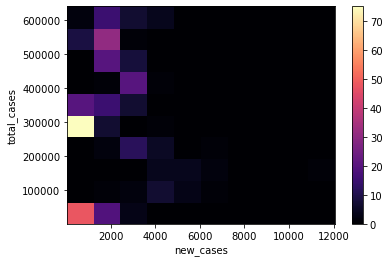

In [60]:
plt.hist2d(df3["new_cases"], df3["total_cases"], bins=10, cmap="magma")
plt.xlabel("new_cases")
plt.ylabel("total_cases")
plt.colorbar();

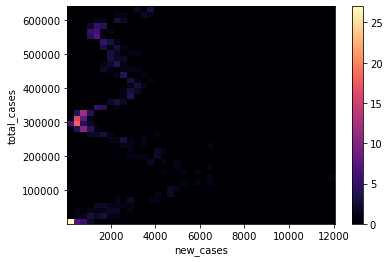

In [61]:
# when bins increases then it becomes more and more like a scatter plot
plt.hist2d(df3["new_cases"], df3["total_cases"], bins=40, cmap="magma")
plt.xlabel("new_cases")
plt.ylabel("total_cases")
plt.colorbar();